# Линейные модели, SVM и деревья решений

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm, tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from operator import itemgetter

In [2]:
wine = load_wine()

In [3]:
df = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

In [4]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [5]:
# проверим есть ли пропущенные значения
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [44]:
# разделение на обучающую и тестовую выборки
y = df['target']
X = df.drop('target', axis = 1)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.4, random_state=1)

In [38]:
# Размер обучающей выборки
X_train.shape, y_train.shape

((106, 13), (106,))

In [39]:
# Размер тестовой выборки
X_test.shape, y_test.shape

((72, 13), (72,))

### Логистическая регрессия

In [45]:
lr = LogisticRegression(random_state=1)
lr_prediction = lr.fit(X_train, y_train).predict(X_test)

### SVM

In [54]:
svc = svm.SVC(random_state=1)
svc_prediction = svc.fit(X_train, y_train).predict(X_test)

### Дерево решений

In [55]:
dt = DecisionTreeClassifier(random_state=1)
dt_prediction = dt.fit(X_train, y_train).predict(X_test)

### Оценка качества решений

In [56]:
print("Logistic regression: ", accuracy_score(y_test, lr_prediction))
print("SVM: ", accuracy_score(y_test, svc_prediction))
print("Decision tree: ", accuracy_score(y_test, dt_prediction))

Logistic regression:  0.9722222222222222
SVM:  1.0
Decision tree:  0.8472222222222222


Logistic regression:  0.9722222222222222


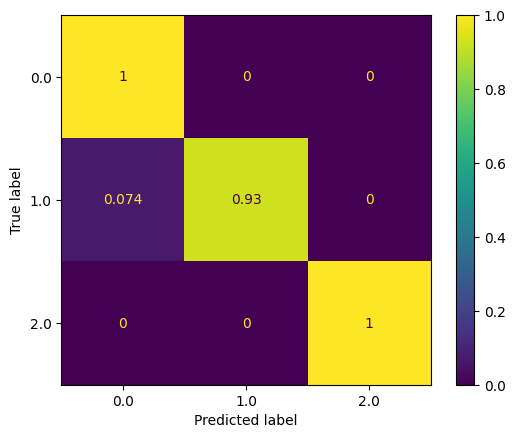

In [57]:
print("Logistic regression: ", accuracy_score(y_test, lr_prediction))

cm = confusion_matrix(y_test, lr_prediction, labels=np.unique(df.target), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(df.target))
disp.plot()

SVM:  1.0


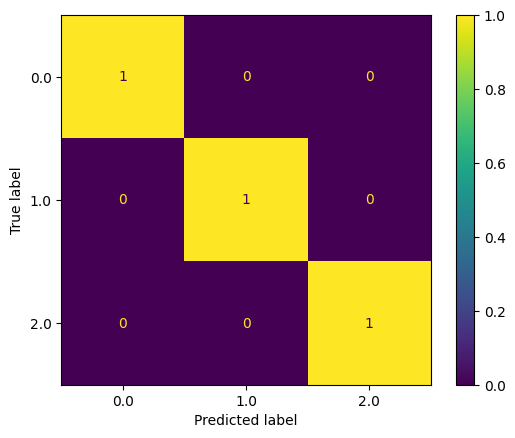

In [58]:
print("SVM: ", accuracy_score(y_test, svc_prediction))

cm = confusion_matrix(y_test, svc_prediction, labels=np.unique(df.target), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(df.target))
disp.plot()

Decision tree:  0.8472222222222222


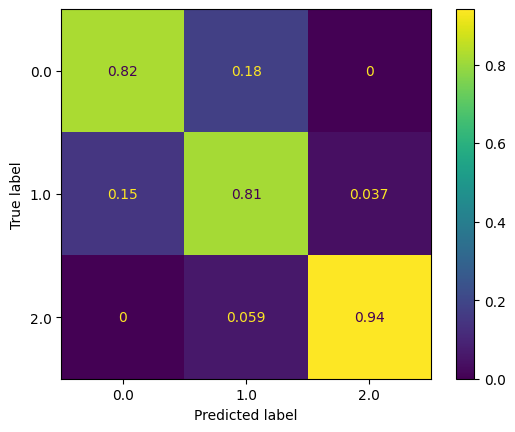

In [59]:
print("Decision tree: ", accuracy_score(y_test, dt_prediction))

cm = confusion_matrix(y_test, dt_prediction, labels=np.unique(df.target), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(df.target))
disp.plot()

### Важность признаков

In [60]:
list(zip(X.columns.values, dt.feature_importances_))

[('alcohol', 0.027443167132501212),
 ('malic_acid', 0.008909790472828315),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.0),
 ('total_phenols', 0.019156049516580825),
 ('flavanoids', 0.3560739545084896),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.0),
 ('hue', 0.03831209903316165),
 ('od280/od315_of_diluted_wines', 0.11394366544271672),
 ('proline', 0.4361612738937215)]

In [61]:
def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    # Sorting the values of the importance of features in descending order
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Features names
    labels = [x for x,_ in sorted_list]
    # Features importance
    data = [x for _,x in sorted_list]
    # Graph output
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Values output
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

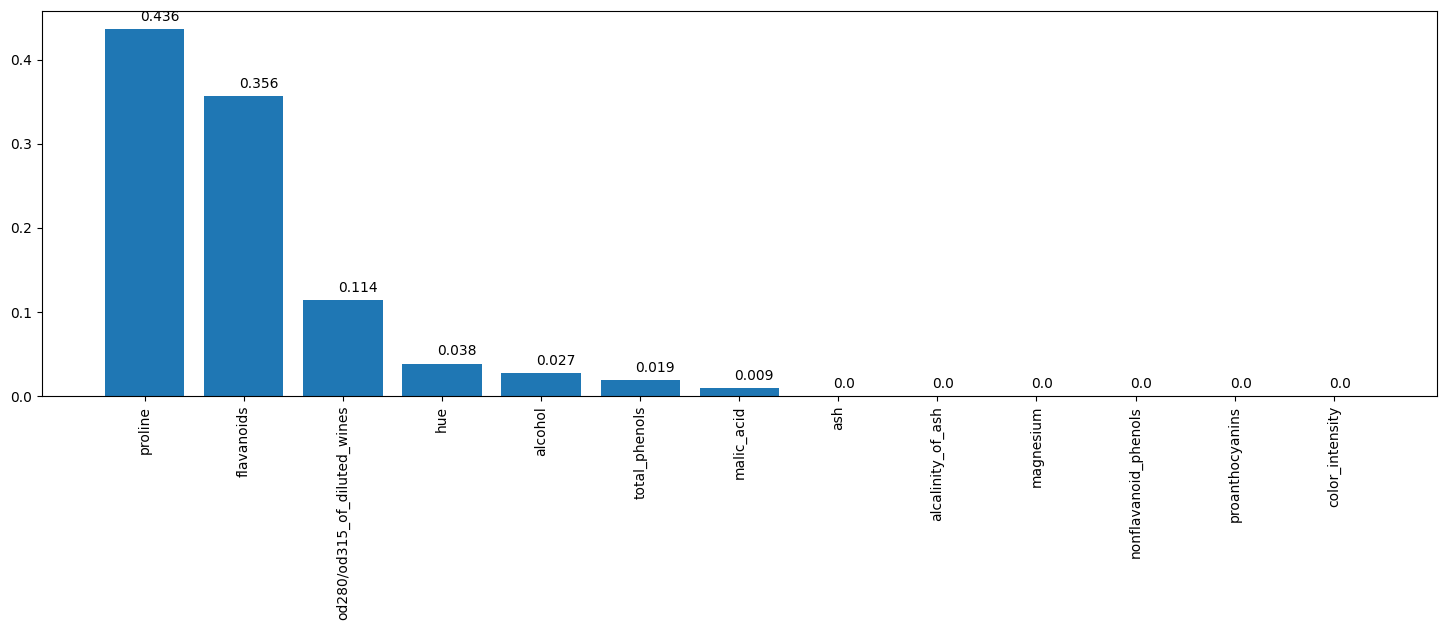

In [63]:
dt_fl, dt_fd = draw_feature_importances(dt, X)

[Text(0.4444444444444444, 0.9375, 'x[12] <= 0.471\ngini = 0.657\nsamples = 106\nvalue = [31, 44, 31]'),
 Text(0.3333333333333333, 0.8125, 'x[6] <= 0.134\ngini = 0.543\nsamples = 80\nvalue = [5, 44, 31]'),
 Text(0.2222222222222222, 0.6875, 'gini = 0.0\nsamples = 25\nvalue = [0, 0, 25]'),
 Text(0.4444444444444444, 0.6875, 'x[11] <= 0.086\ngini = 0.34\nsamples = 55\nvalue = [5, 44, 6]'),
 Text(0.3333333333333333, 0.5625, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(0.5555555555555556, 0.5625, 'x[12] <= 0.344\ngini = 0.215\nsamples = 50\nvalue = [5, 44, 1]'),
 Text(0.3333333333333333, 0.4375, 'x[0] <= 0.808\ngini = 0.088\nsamples = 44\nvalue = [1, 42, 1]'),
 Text(0.2222222222222222, 0.3125, 'x[1] <= 0.629\ngini = 0.045\nsamples = 43\nvalue = [1, 42, 0]'),
 Text(0.1111111111111111, 0.1875, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]'),
 Text(0.3333333333333333, 0.1875, 'x[5] <= 0.497\ngini = 0.444\nsamples = 3\nvalue = [1, 2, 0]'),
 Text(0.2222222222222222, 0.0625, 'gini = 0.0\nsa

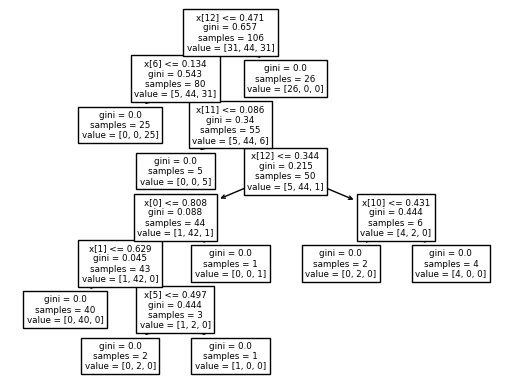

In [64]:
tree.plot_tree(dt) 